In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

/var/folders/js/v9gqwrcj5nsg_r2cclzp51lw0000gn/T/ipykernel_8285/1881076636.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#loads dataset with selected columns
df = pd.read_csv('/Users/jakefine/Desktop/INST414/matches.csv')

selected_columns = ['Date', 'Team', 'Opponent', 'Venue', 'Attendance', 'Result']
data_selected = df[selected_columns]

print(data_selected.head())

         Date       Team       Opponent Venue  Attendance Result
0  2023-08-13  Liverpool        Chelsea  Away     40096.0      D
1  2023-08-19  Liverpool    Bournemouth  Home     53145.0      W
2  2023-08-27  Liverpool  Newcastle Utd  Away     52214.0      W
3  2023-09-03  Liverpool    Aston Villa  Home     50109.0      W
4  2023-09-16  Liverpool         Wolves  Away     31257.0      W


In [4]:
#converts objects to proper datatypes: date to datetime, venue to boolean, result to numeric values
#cleaning

df['Date'] = pd.to_datetime(df['Date'])
df['Venue'] = df['Venue'] == 'Home'

map_results = {'L': 0, 'W': 1, 'D': 0.5}
df['Result'] = df['Result'].map(map_results)

In [5]:
#calculating average attendance and win percentage
total_attendance = df.groupby('Team')['Attendance'].sum()

total_matches = df.groupby('Team').size()

matches_won = df[df['Result'] == 1].groupby('Team').size()

average_attendance = total_attendance / total_matches

win_percentage = (matches_won / total_matches) * 100

#store results in results_df
results_df = pd.DataFrame({
    'Average Attendance': average_attendance,
    'Win Percentage': win_percentage
})

results_df = results_df.sort_values(by='Win Percentage', ascending=False)

print(results_df)

                        Average Attendance  Win Percentage
Team                                                      
Arsenal                       44983.703704       70.370370
ManchesterCity                45713.777778       70.370370
Liverpool                     43759.555556       70.370370
AstonVilla                    38323.962963       62.962963
TottenhamHotspur              48675.500000       57.692308
ManchesterUnited              56919.592593       51.851852
NewcastleUnited               46331.148148       44.444444
WestHamUnited                 48696.222222       44.444444
WolverhamptonWanderers        35355.481481       40.740741
Chelsea                       39112.269231       38.461538
Fulham                        33291.111111       37.037037
BrightonandHoveAlbion         37429.444444       37.037037
Bournemouth                   27120.423077       30.769231
Everton                       38404.925926       29.629630
Brentford                     29605.666667       25.9259

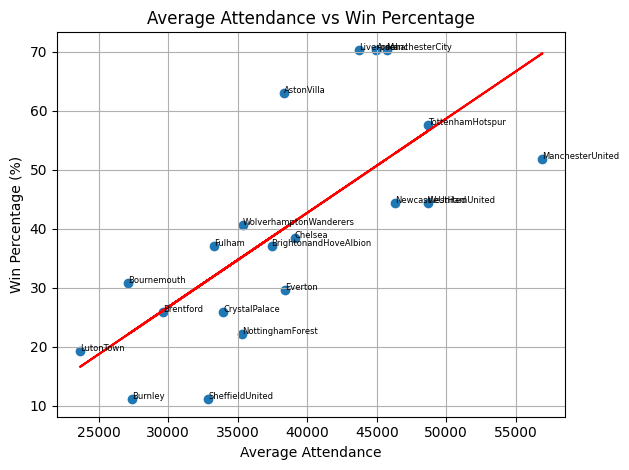

In [6]:
#Average attendance vs. win percentage 
# visualize data
plt.scatter(results_df['Average Attendance'], results_df['Win Percentage'])

# add labels
for i, team in enumerate(results_df.index):
    plt.text(results_df['Average Attendance'].iloc[i], results_df['Win Percentage'].iloc[i], team, fontsize=6)
 
#create a regression line    
x = results_df['Average Attendance']
y = results_df['Win Percentage']

slope, intercept = np.polyfit(x, y, 1)

regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

#scatter plot    
plt.title('Average Attendance vs Win Percentage')
plt.xlabel('Average Attendance')
plt.ylabel('Win Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

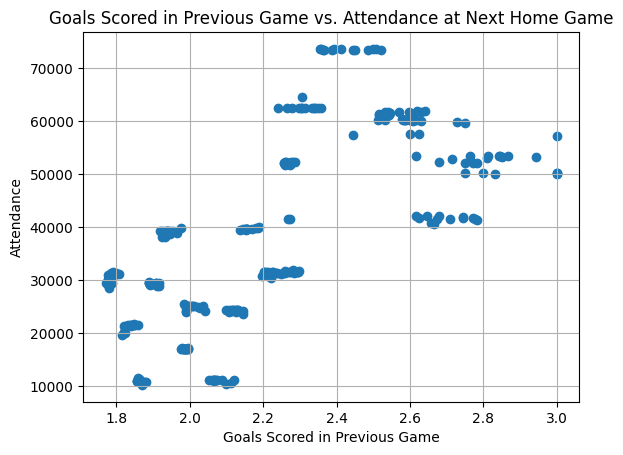

In [11]:
#Previous Game goals scored vs. attendance at next home game
# filter data for home games only
df_home = df[df['Venue'] == True].copy()

#calculate average goals scored in the previous game
df_home['Avg_Goals_Prev_Game'] = df_home['GF'].shift(1).expanding().mean()

#scatter plot
plt.scatter(df_home['Avg_Goals_Prev_Game'], df_home['Attendance'])
plt.title('Goals Scored in Previous Game vs. Attendance at Next Home Game')
plt.xlabel('Goals Scored in Previous Game')
plt.ylabel('Attendance')
plt.grid(True)

plt.show()

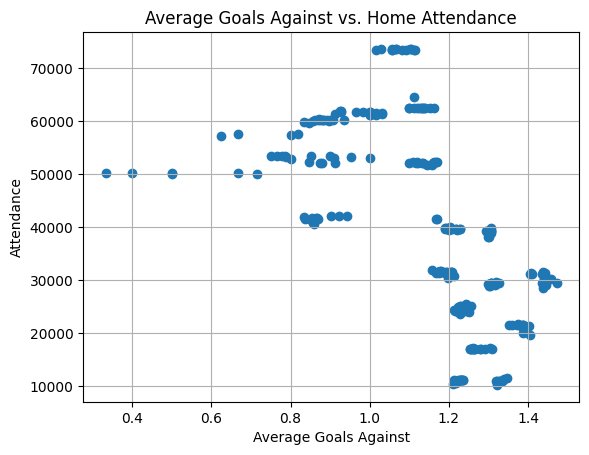

In [12]:
# Average goals against vs home attendance
# filter data for home games only
df_home = df[df['Venue'] == True].copy() 

#calculate average goals against
df_home['Avg_GA'] = df_home['GA'].expanding().mean()

# Plotting
plt.scatter(df_home['Avg_GA'], df_home['Attendance'])
plt.title('Average Goals Against vs. Home Attendance')
plt.xlabel('Average Goals Against')
plt.ylabel('Attendance')
plt.grid(True)

plt.show()


In [9]:
#ENCOUNTERED PROBLEMS FOR LAST 2 GRAPHS:
# Could not get regression lines because of undefined (NaN) data
